
Missing values before cleaning:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Missing values after cleaning:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0 

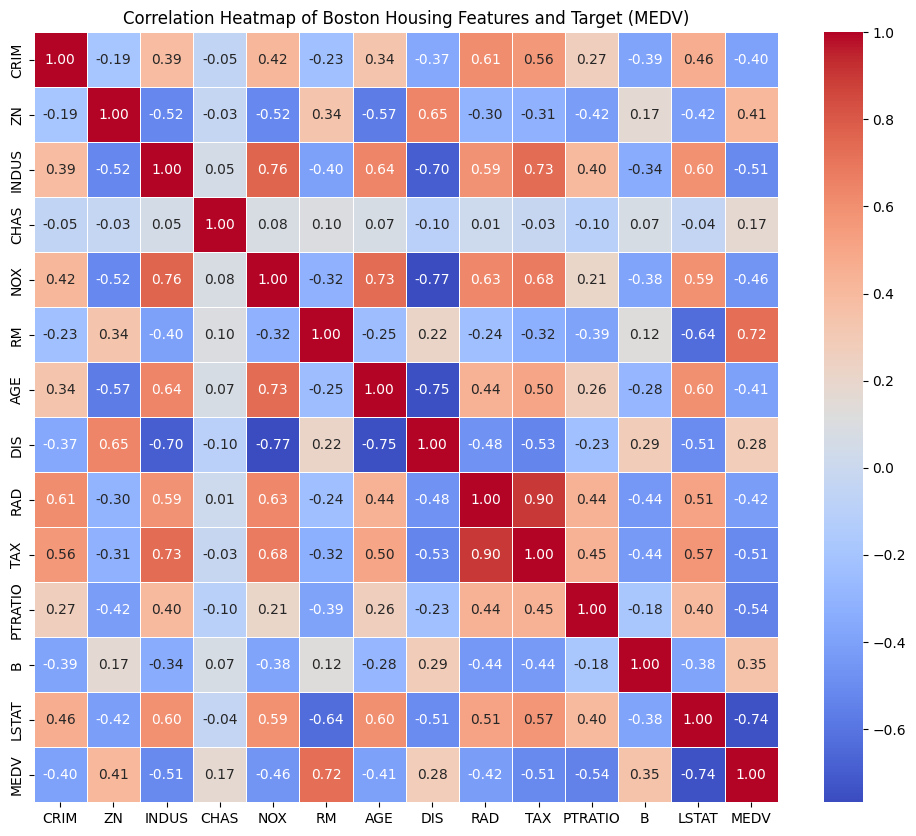

Epoch 1/495
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 524.7477
Epoch 2/495
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 533.2527 
Epoch 3/495
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 480.3023 
Epoch 4/495
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 437.6620 
Epoch 5/495
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 369.2865 
Epoch 6/495
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 292.1382 
Epoch 7/495
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 218.7244
Epoch 8/495
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 163.0598
Epoch 9/495
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88.5383 
Epoch 10/495
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 63.4715 
Epoch 11/495
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 54.6247 
Epoch 12/495
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37.8633 
Epoch 13/495
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.2337 
Epoch 14/495
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.3559 
Epoch 15/495
10/10 ━━━━━━━━━━━━━━━━━

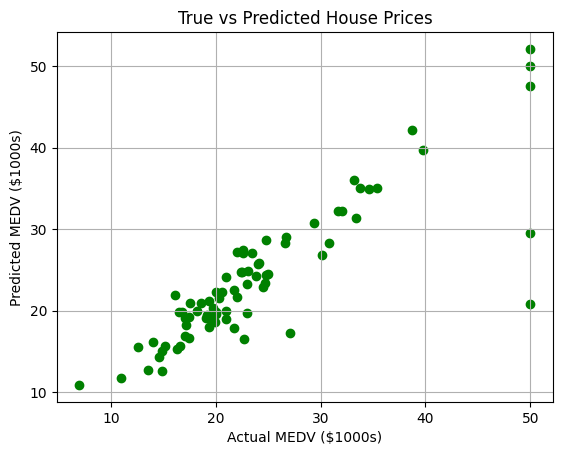

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load CSV file
df = pd.read_csv('HousingData.csv')

# Check and handle missing values
print("\nMissing values before cleaning:\n", df.isnull().sum())
df = df.dropna()  # Optionally, use df.fillna(df.mean()) to fill missing values
print("\nMissing values after cleaning:\n", df.isnull().sum())

# Display first few rows to verify
print(df.head())

# Separate features and target
X = df.drop("MEDV", axis=1)  # Features
y = df["MEDV"]               # Target (House price)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Plot correlation heatmap
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of Boston Housing Features and Target (MEDV)')
plt.show()

# Build and compile model
model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))  # Output layer for regression

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=495, batch_size=32, verbose=1)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'\nTest Loss (Mean Squared Error): {test_loss:.2f}')

# Predict
y_pred = model.predict(X_test)

# Print results
print("\nSample Predictions:")
for true, pred in zip(y_test[:10], y_pred[:10]):
    print(f"True value: {true:.2f}, Predicted value: {pred[0]:.2f}")

# Metrics
print("\nEvaluation Metrics:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Scatter plot
plt.scatter(y_test, y_pred, c='green')
plt.xlabel("Actual MEDV ($1000s)")
plt.ylabel("Predicted MEDV ($1000s)")
plt.title("True vs Predicted House Prices")
plt.grid(True)
plt.show()
